In [1]:
## 1. Importing the dependencies

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

## 2. Data Loading & Understanding

In [2]:
# Read the CSV data to a pandas dataframe
df = pd.read_csv("train.csv")

In [3]:
df.shape

(800, 22)

In [4]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [5]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [6]:
# Display all columns of a dataframe
pd.set_option("display.max_column", None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [8]:
#Convert age column datatype to integer
df["age"] = df["age"].astype(int)

In [9]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [10]:
df.head(3)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1


In [11]:
# For Loop

for col in df.columns:
    print(col)
    

ID
A1_Score
A2_Score
A3_Score
A4_Score
A5_Score
A6_Score
A7_Score
A8_Score
A9_Score
A10_Score
age
gender
ethnicity
jaundice
austim
contry_of_res
used_app_before
result
age_desc
relation
Class/ASD


In [12]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [13]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [14]:
for i in df.columns:
    numerical_features = ["ID", "age", "result"]
    if i not in numerical_features:
        print(i, ',',df[i].unique())
        print("-"*40)


A1_Score , [1 0]
----------------------------------------
A2_Score , [0 1]
----------------------------------------
A3_Score , [1 0]
----------------------------------------
A4_Score , [0 1]
----------------------------------------
A5_Score , [1 0]
----------------------------------------
A6_Score , [0 1]
----------------------------------------
A7_Score , [1 0]
----------------------------------------
A8_Score , [0 1]
----------------------------------------
A9_Score , [1 0]
----------------------------------------
A10_Score , [1 0]
----------------------------------------
gender , ['f' 'm']
----------------------------------------
ethnicity , ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
----------------------------------------
jaundice , ['no' 'yes']
----------------------------------------
austim , ['no' 'yes']
----------------------------------------
contry_of_res , ['Austria' 'India' 'United Stat

In [15]:
# dropping ID and Age_desc column
df = df.drop(columns = ["ID", "age_desc"])

In [16]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [17]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [18]:
df.info("contry_of_res")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    int64  
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result          

In [19]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [20]:
# Define the mapping dictionary for country names

mapping = {
    "Viet Nam" : "Vietnam",
    "AmericanSamoa" : "United State"
}

#replace value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [21]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'United State', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [22]:
# Target class distribution
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

** Insight :**
1. missing values ion ethnicity & relation 
2. age_desc column has only 1 unique value. so it is removed as iis nit important for prediction
3. fixed country names 
4. identified class imbalance in the target column 


3. Exploratrory Data Analysis(EDA)

In [23]:
df.shape

(800, 20)

In [24]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [25]:
df.head(3)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1


In [26]:
df.tail(4)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
796,0,1,1,0,0,1,0,1,1,1,20,m,White-European,no,no,Cyprus,no,13.561518,Self,0
797,0,0,0,0,0,0,0,0,0,0,5,m,South Asian,yes,no,New Zealand,no,2.653177,Self,0
798,0,0,0,0,0,0,0,0,0,0,16,f,?,no,no,Canada,no,9.069342,Self,0
799,0,1,0,0,0,0,0,0,0,0,46,f,?,no,no,United Arab Emirates,yes,2.243304,Self,0


In [27]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


Univariate Analysis 

Numerical Column:
- age
- result

In [28]:
#Set the desired theme 
sns.set_theme(style="dark")

Distribution Plots


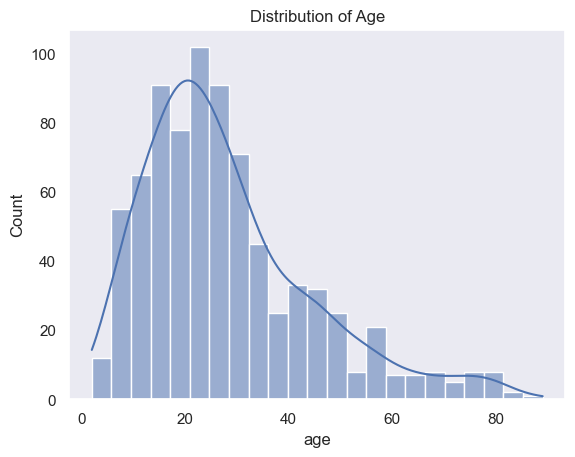

In [29]:
#histogram for "age"

sns.histplot(df["age"], kde =True)
plt.title("Distribution of Age")
plt.show()

Mean: 27.96375
Median: 24.0


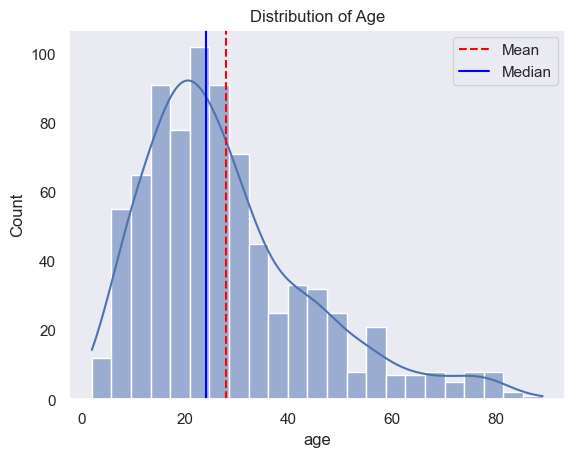

In [30]:
# Histogram for Age
from matplotlib.lines import lineStyles


sns.histplot(df["age"], kde =True)
plt.title("Distribution of Age")

#Calculate mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)

#add vertical lines for mean and median :-

plt.axvline(age_mean, color="red" , linestyle = '--', label = "Mean")
plt.axvline(age_median, color = "blue",linestyle = "-", label = 'Median')
 
plt.legend()

plt.show()

Mean: 8.537303106501248
Median: 9.605299308


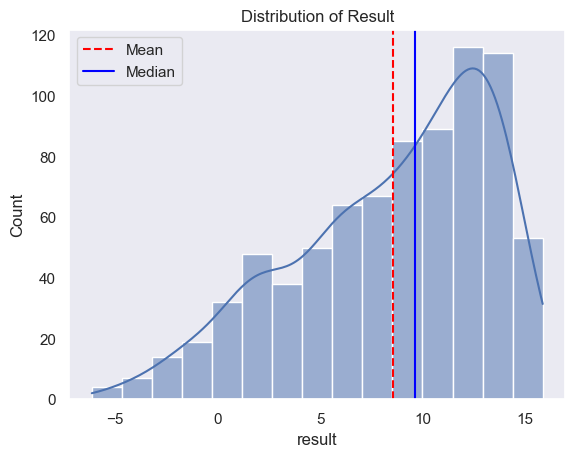

In [31]:
# Histogram for Result
from unittest import result
from matplotlib.lines import lineStyles


sns.histplot(df["result"], kde =True)
plt.title("Distribution of Result")

#Calculate mean and median
result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean:", result_mean)
print("Median:", result_median)

#add vertical lines for mean and median :-

plt.axvline(result_mean, color="red" , linestyle = '--', label = "Mean")
plt.axvline(result_median, color = "blue",linestyle = "-", label = 'Median')
 
plt.legend()

plt.show()

Box Plot for identifying outliers in the numerical columns 

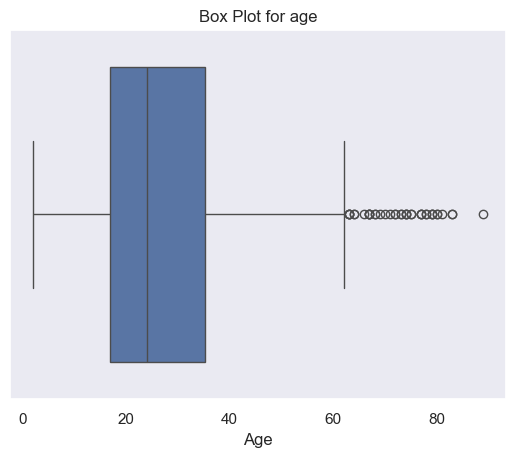

In [32]:
#Box plot 
sns.boxplot(x = df["age"])
plt.title("Box Plot for age")
plt.xlabel("Age")
plt.show()

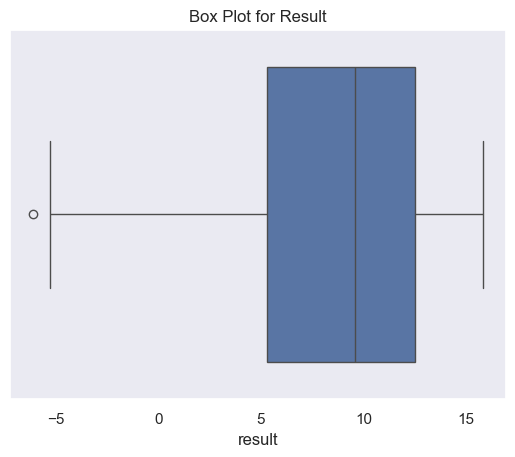

In [33]:
#Box plot
sns.boxplot(x=df["result"])
plt.title("Box Plot for Result")
plt.xlabel("result")
plt.show()

In [34]:
df['age'].describe()

count    800.000000
mean      27.963750
std       16.329827
min        2.000000
25%       17.000000
50%       24.000000
75%       35.250000
max       89.000000
Name: age, dtype: float64

In [35]:
# Count the outliers using IQR method


Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 *IQR
age_Outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound )]

In [36]:
df.shape

(800, 20)

In [37]:
age_Outliers.shape

(39, 20)

In [38]:
df['result'].describe()

count    800.000000
mean       8.537303
std        4.807676
min       -6.137748
25%        5.306575
50%        9.605299
75%       12.514484
max       15.853126
Name: result, dtype: float64

In [39]:
#Count the outliers using IQR method
Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 *IQR
result_Outliers = df[(df['result'] < lower_bound) | (df['result'] > upper_bound)]

In [40]:
result_Outliers.shape

(1, 20)

In [41]:
len(age_Outliers)

39

In [42]:
len(result_Outliers)

1

Univariate analysis of categorical features

In [43]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

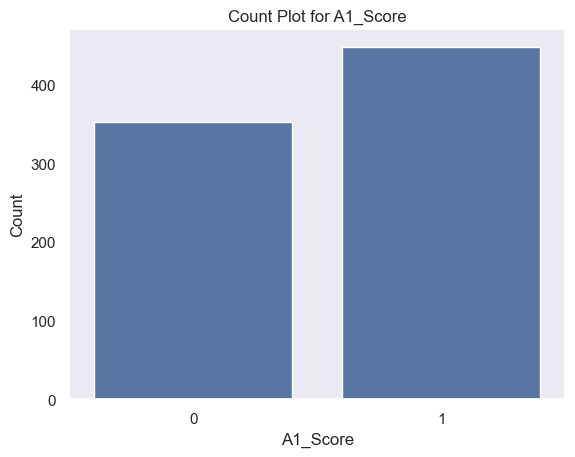

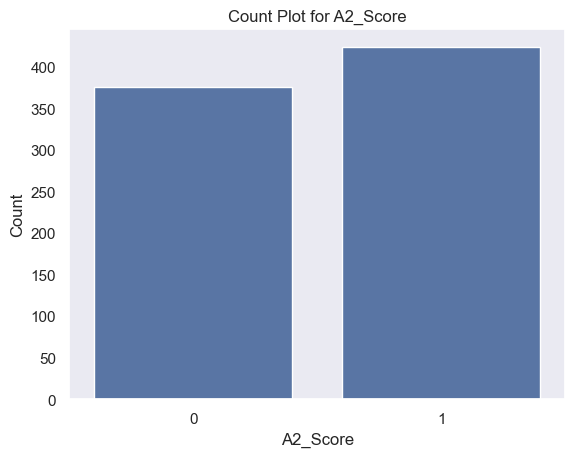

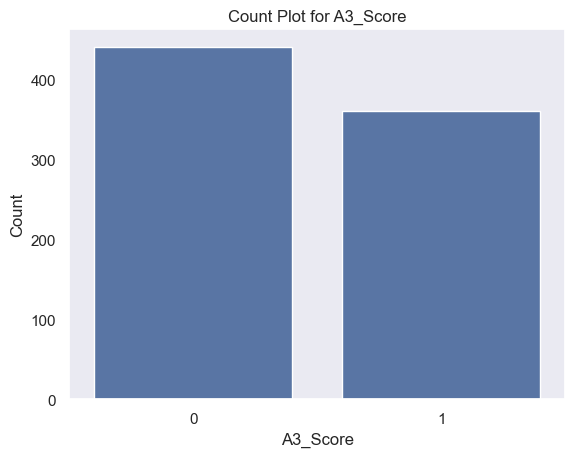

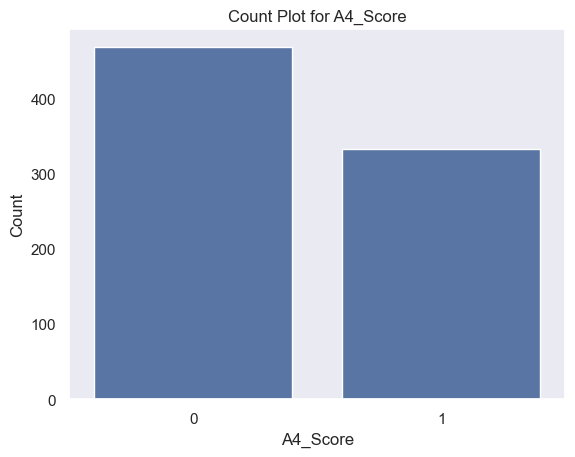

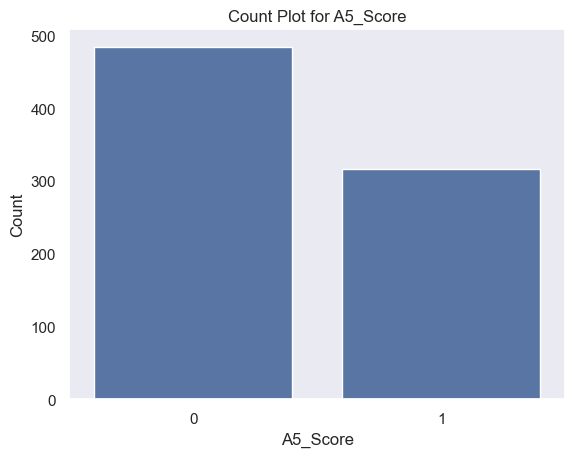

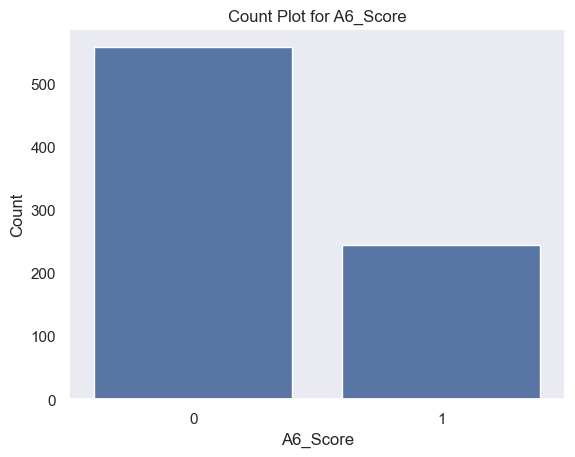

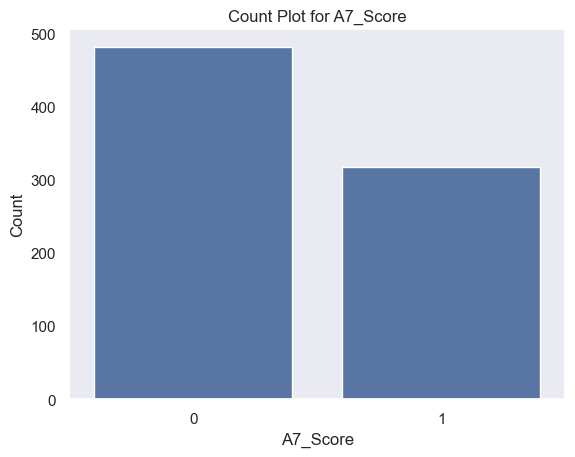

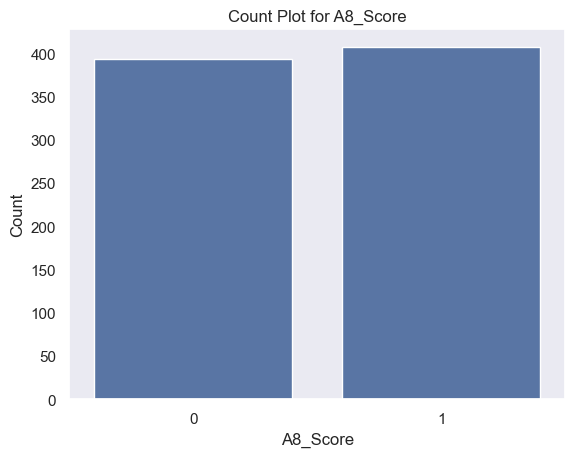

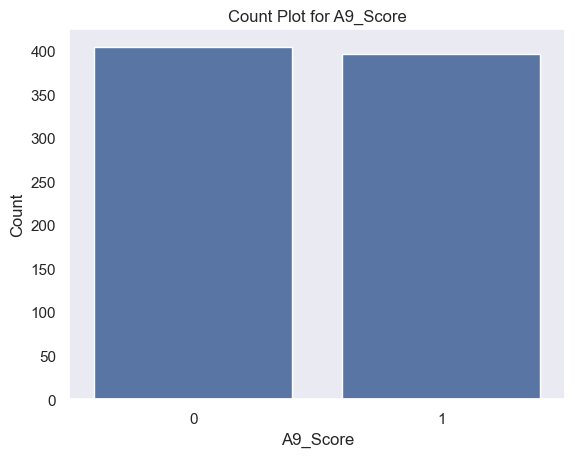

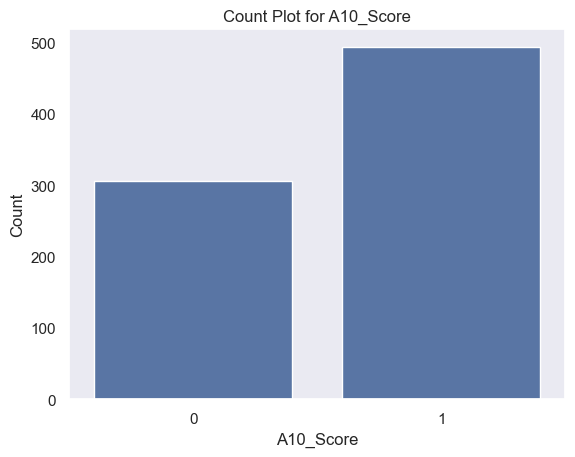

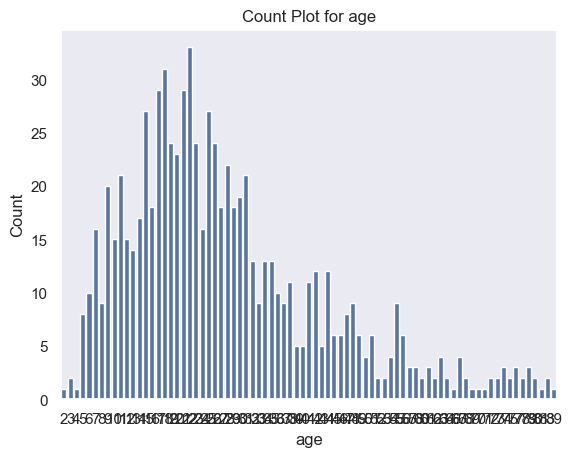

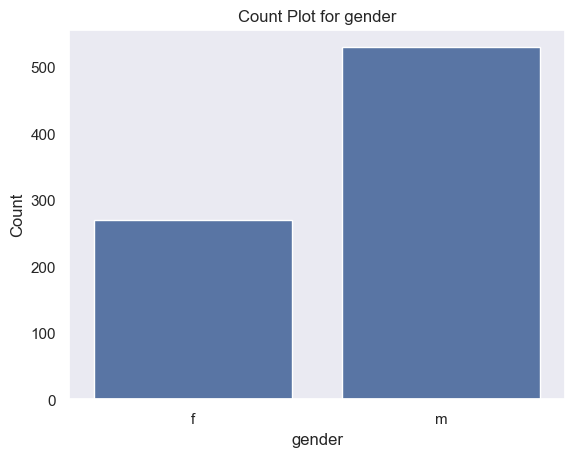

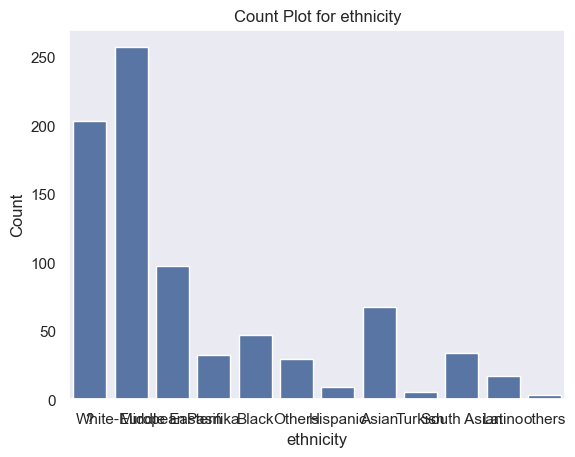

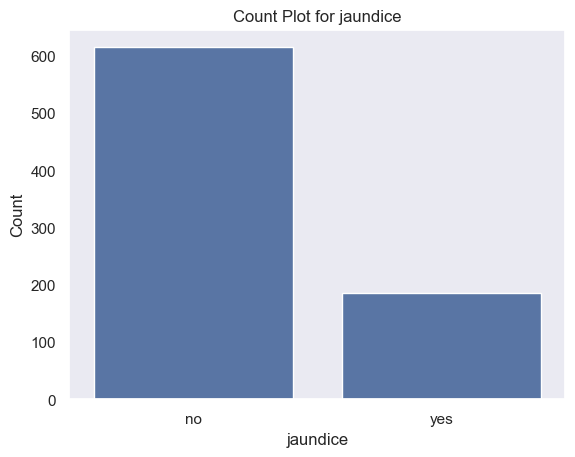

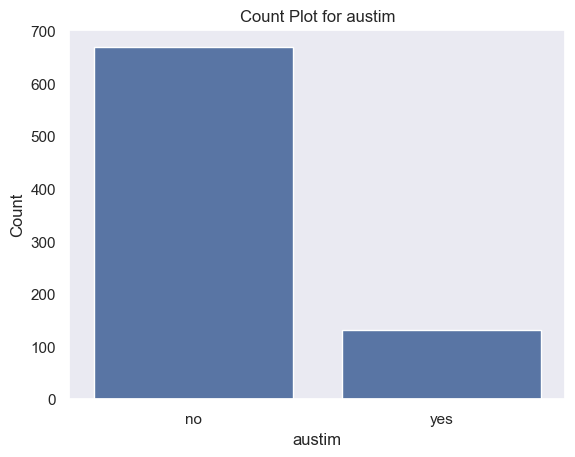

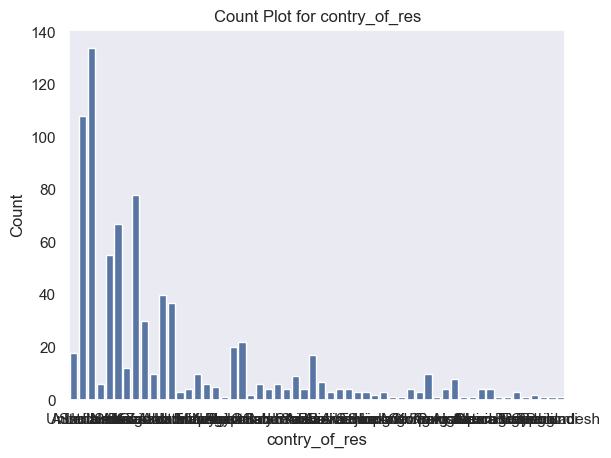

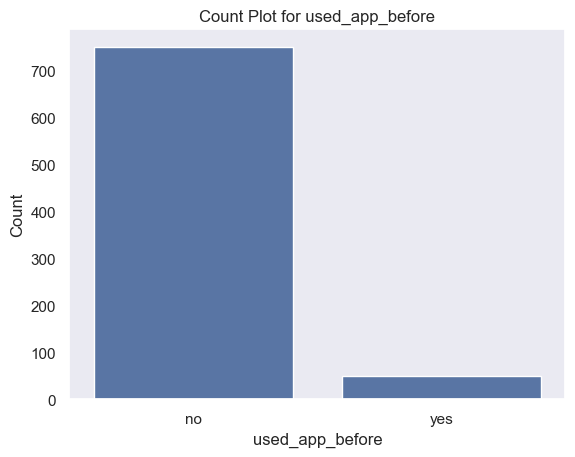

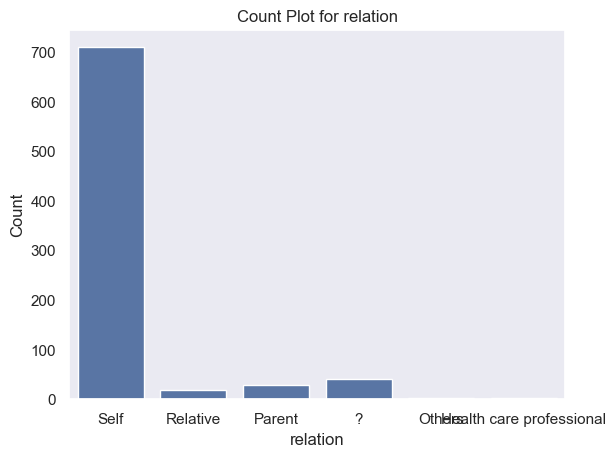

In [44]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

for col in categorical_columns:
       sns.countplot(x= df[col])
       plt.title(f"Count Plot for {col}")
       plt.ylabel("Count")
       plt.show()


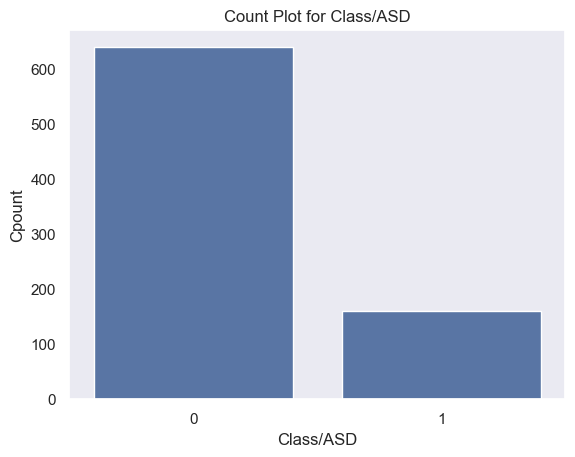

In [45]:
# countplot for target column (Class/ASD)
sns.countplot(x= df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Cpount")
plt.show()

In [46]:
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

Handle missing values in ethnicity amd relation columns


In [47]:
df["ethnicity"] = df["ethnicity"].replace({"?" : "Others" , "others": "Others"})

In [48]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [49]:
df["relation"] = df["relation"].replace(
    {
        "?": "Others",
        "Relative" : "Others",
        "Parent"   : "Others",
        "Health care professional":"Others"}
)

In [50]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [51]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


Label Encoding

In [52]:
df.contry_of_res.value_counts()


contry_of_res
United States           134
India                   108
New Zealand              78
United Kingdom           67
Jordan                   55
United Arab Emirates     40
Australia                37
Canada                   30
Afghanistan              22
Netherlands              20
Austria                  18
Sri Lanka                17
Brazil                   12
France                   10
Spain                    10
Kazakhstan               10
Ireland                   9
Iran                      8
Russia                    7
South Africa              6
Bahamas                   6
Italy                     6
Malaysia                  6
Vietnam                   5
Nicaragua                 4
Pakistan                  4
Armenia                   4
United State              4
Iraq                      4
Azerbaijan                4
Aruba                     4
Saudi Arabia              4
China                     4
Mexico                    4
Ukraine                   3
Niger 

In [53]:
#IDentify columns with 'object' data types
object_columns = df.select_dtypes(include=["object"]).columns

In [54]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [55]:
#initialize a dictionary to store the encoders
encoders ={}

#apply labelencoding and store the encoders

for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder # saving the encoder for this column

    # save the emcoders as a pickle file 
    with open("encoder.pkl", "wb") as f:
        pickle.dump(encoders, f)

In [56]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [57]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,54,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,54,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,45,0,-4.777286,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,0,0,0,0,0,0,1,1,16,1,2,0,0,35,0,12.999501,1,0
796,0,1,1,0,0,1,0,1,1,1,20,1,9,0,0,16,0,13.561518,1,0
797,0,0,0,0,0,0,0,0,0,0,5,1,7,1,0,35,0,2.653177,1,0
798,0,0,0,0,0,0,0,0,0,0,16,0,5,0,0,14,0,9.069342,1,0


Bivariate Analysis

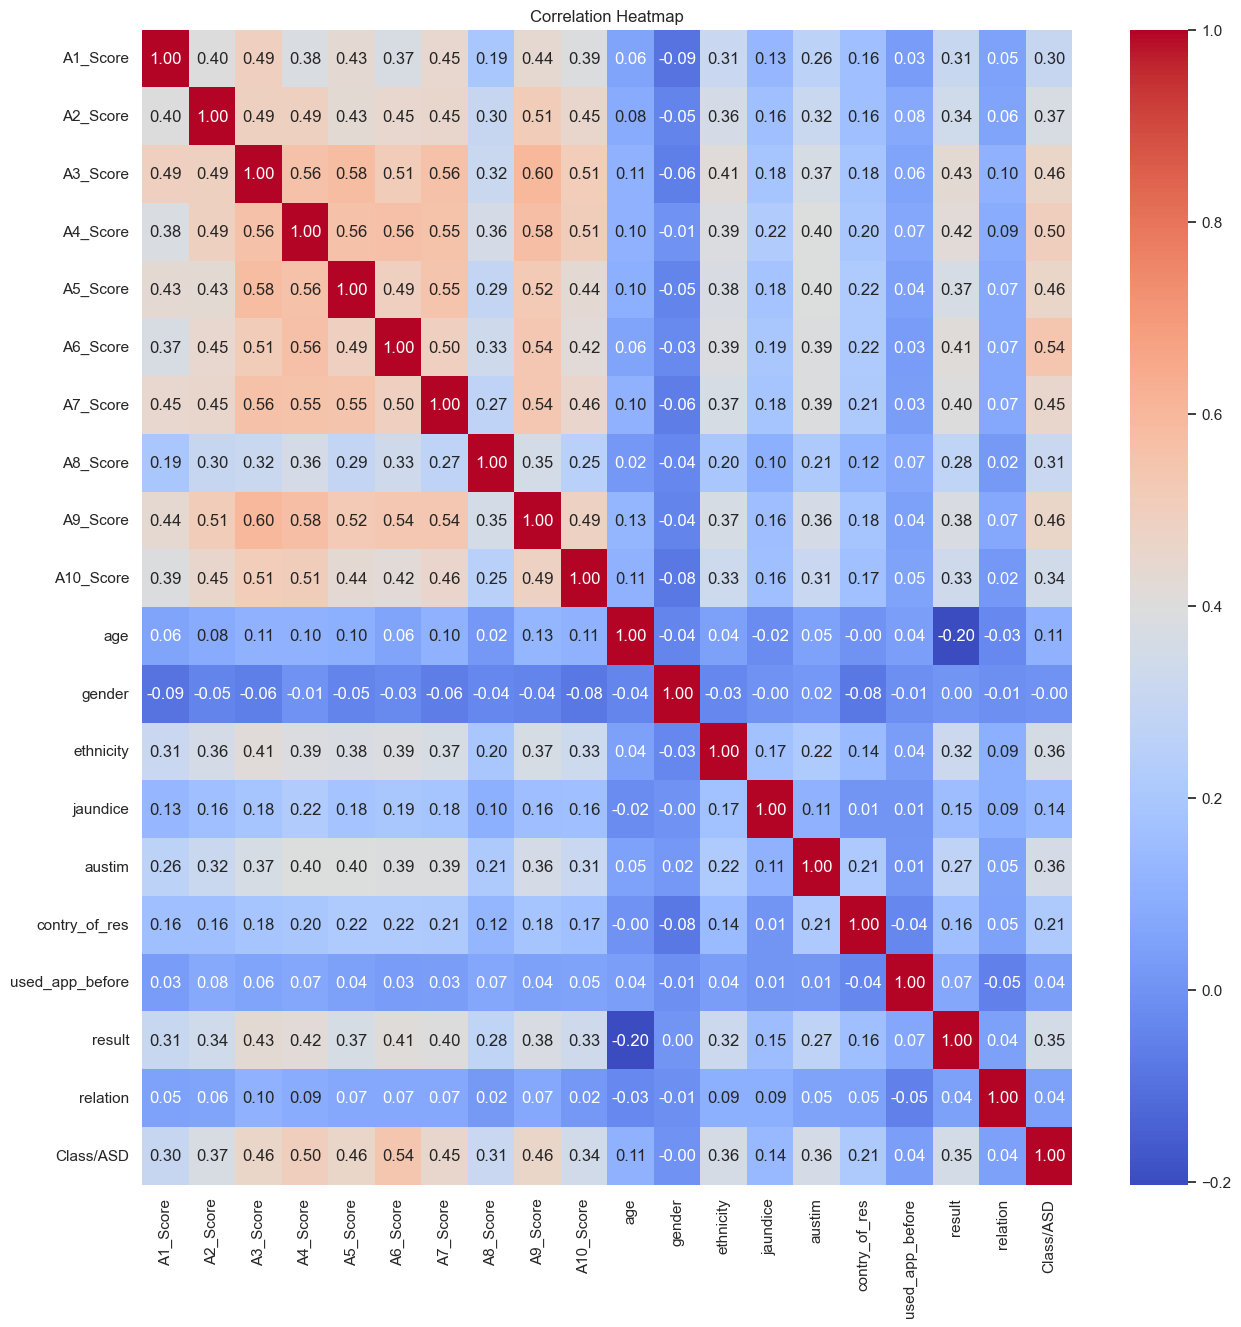

In [58]:
# Correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm", fmt= ".2f")
plt.title("Correlation Heatmap")
plt.show() 

Insight from EDA:--

- There are feww outliers in the numerical columns (age, results)
- There is a class imbalance in the target columns
- There is a class imbalance in the categorical features
- We dont't have highly correlated column 
- Performed label encoding and saved the encoders

4. Data preprocessing 

Handling teh outliers

In [59]:
# function to replace the outliers with median

def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3- Q1

    lower_bound = Q1 - 1.5 *IQR
    upper_bound = Q3 + 1.5 *IQR

    median = df[column].median()

    # replace outliers with median value

    df[column] = df[column].apply (lambda x : median if x < lower_bound or x > upper_bound else x)

    return df


In [60]:
# replace outliers in the "age" column
df = replace_outliers_with_median(df, "age")

# replace outliers in the "result" column
df = replace_outliers_with_median(df, "result")

In [61]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,54,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,54,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,45,0,-4.777286,1,0


In [62]:
df.shape

(800, 20)

Train Test Split

In [63]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [64]:
x = df.drop(columns = ["Class/ASD"])
y = df["Class/ASD"]


In [65]:
print(x)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [66]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [67]:
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42 )

In [68]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [69]:
y_train.value_counts() 

Class/ASD
0    515
1    125
Name: count, dtype: int64

In [70]:
y_test.value_counts()

Class/ASD
0    124
1     36
Name: count, dtype: int64

SMOTE (Synthetic Minority Oversampling Technique)


In [71]:
smote = SMOTE(random_state=42)

In [72]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [73]:
print(y_train_smote.shape)

(1030,)


In [74]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


5. Model Training

In [75]:
# list of classifiers

import random

from pandas.core.common import random_state


models = {
     "Descision Tree" : DecisionTreeClassifier(random_state=42),
     "Random Forest": RandomForestClassifier(random_state= 42),
     "XGBoost" : XGBClassifier(random_state = 42)
}

In [76]:
print(models)

{'Descision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)}


In [77]:
# Dictonary to store the cross validation results
cv_scores = {}

#perform 5- fold cross validation for each model 
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters...")
    scores = cross_val_score (model, x_train_smote, y_train_smote, cv=5, scoring ="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
    print("-"*50)

Training Descision Tree with default parameters...
Descision Tree Cross-Validation Accuracy: 0.84
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.92
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.91
--------------------------------------------------


In [78]:
cv_scores

{'Descision Tree': array([0.79126214, 0.8592233 , 0.84466019, 0.86407767, 0.83980583]),
 'Random Forest': array([0.89805825, 0.9368932 , 0.92718447, 0.90776699, 0.90776699]),
 'XGBoost': array([0.86893204, 0.91747573, 0.92718447, 0.91262136, 0.9223301 ])}

6. Model Selection & Hyperparameter Tuning

In [79]:
# Initializing models

decision_tree = DecisionTreeClassifier(random_state = 42)
random_forest = RandomForestClassifier(random_state = 42)
xgboost_classi = XGBClassifier( random_state = 42)

# Decision Tree
#from sklearn.tree import DecisionTreeClassifier
#decision_tree = DecisionTreeClassifier(random_state=42)

# Random Forest
#from sklearn.ensemble import RandomForestClassifier
#random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)

# XGBoost
#from xgboost import XGBClassifier
#from sklearn.model_selection import RandomizedSearchCV


In [80]:
# Hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [None, 10, 20, 30, 50, 70],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],   # ✅ correct spelling
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

param_grid_xgb = {
    "n_estimators" : [50, 100, 200, 500],
    "max_depth" :[3, 5, 7, 10],
    "learning_rate" : [0.01, 0.1, 0.2, 0.3],
    "subsamples" : [0.5, 0.7, 1.0],
    "colsample_bytree" : [0.5, 0.7, 1.0]
}


In [81]:
# Hyperparameter tunig for 3 tree based models

# the below steps can be automated by using for loop or by using a pipeline

# perform RandomizedSearchCV for each model
# Now the searches (assuming your param grids are defined)

random_search_dt = RandomizedSearchCV(estimator = decision_tree, param_distributions = param_grid_dt, n_iter = 10, cv=5, scoring="accuracy", random_state= 42)
random_search_rf = RandomizedSearchCV(estimator = random_forest, param_distributions = param_grid_rf, n_iter = 10, cv=5 ,scoring="accuracy", random_state = 42)
random_search_xgb = RandomizedSearchCV(estimator = xgboost_classi, param_distributions = param_grid_xgb, n_iter= 10, cv=5, scoring = "accuracy", random_state = 42 )

In [82]:
# fit the models

random_search_dt.fit(x_train_smote, y_train_smote)
random_search_rf.fit(x_train_smote, y_train_smote)
random_search_xgb.fit(x_train_smote, y_train_smote)

c:\Users\0503p\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "subsamples" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\0503p\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "subsamples" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\0503p\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "subsamples" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\0503p\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:39] WARNING: C:\actions-runner\_work\xgboo

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsamples': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [83]:
#for decision tree

print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)
0.8524271844660193


In [84]:
# for random forest

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2',
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=42)
0.9067961165048544


In [85]:
# for XGBoost 

print(random_search_xgb.best_estimator_)
print(random_search_xgb.best_score_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)
0.9077669902912622


In [86]:
# Get best model from RandomForest  
# from Chatgpt:--


best_model = random_search_rf.best_estimator_
best_score = random_search_rf.best_score_

# Compare with XGB
if random_search_xgb.best_score_ > best_score:   # ✅ underscore added
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_

# Compare with DecisionTree
if random_search_dt.best_score_ > best_score:   # ✅ underscore added
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_

print("Best Model:", best_model)
print("Best Score:", best_score)


Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)
Best Score: 0.9077669902912622


In [87]:
# Get the models with best scores

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
    best_model = random_search_rf.best_estimator_
    best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_

In [88]:
print(f"Best_model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:2f}")

Best_model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)
Best Cross-Validation Accuracy: 0.907767


In [89]:
# Save the best model 
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)